# Time Series Forecasting

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [3]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [5]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [6]:
mobile_sales.DATE.describe()

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_1044/20359885.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.DATE.describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [ ]:
2001 - 2019

18 years + 1 month

In [7]:
18*12 + 1

217

In [9]:
mobile_sales.columns

Index(['DATE', 'Sales'], dtype='object')

In [10]:
mobile_sales.set_index('DATE', inplace=True)

In [11]:
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


<AxesSubplot:xlabel='DATE'>

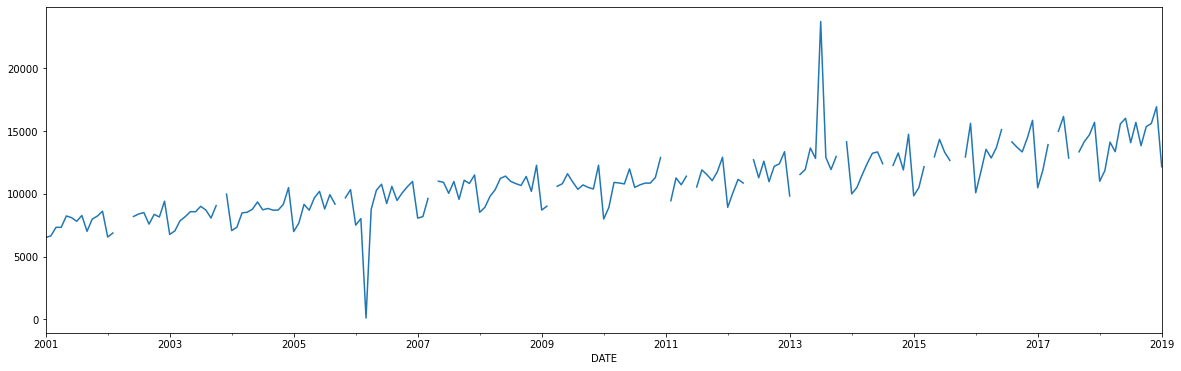

In [14]:
mobile_sales.Sales.plot()

In [17]:
mobile_sales.Sales.mean()

10842.757575757576

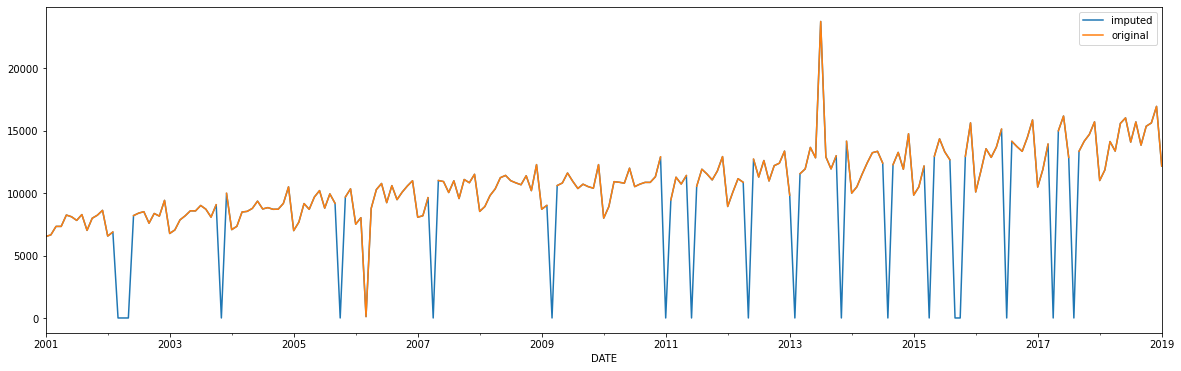

In [21]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

### Linear interpolation

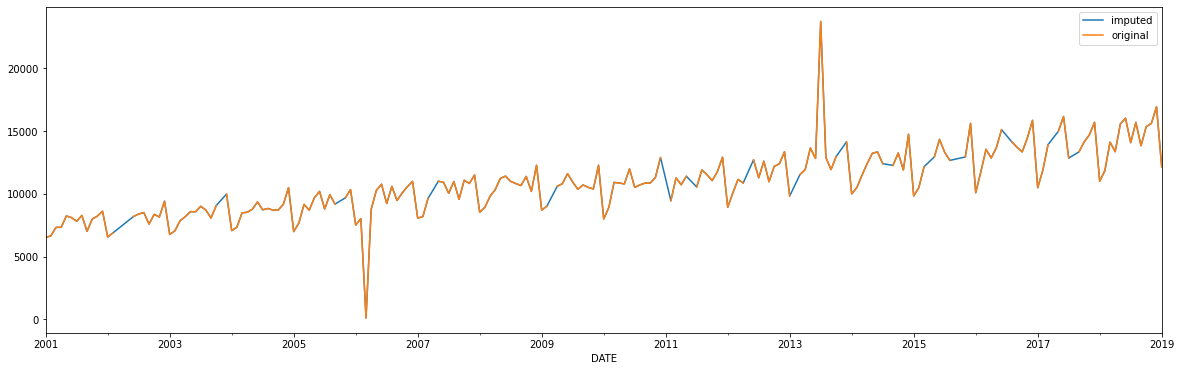

In [23]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()


In [24]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

[]

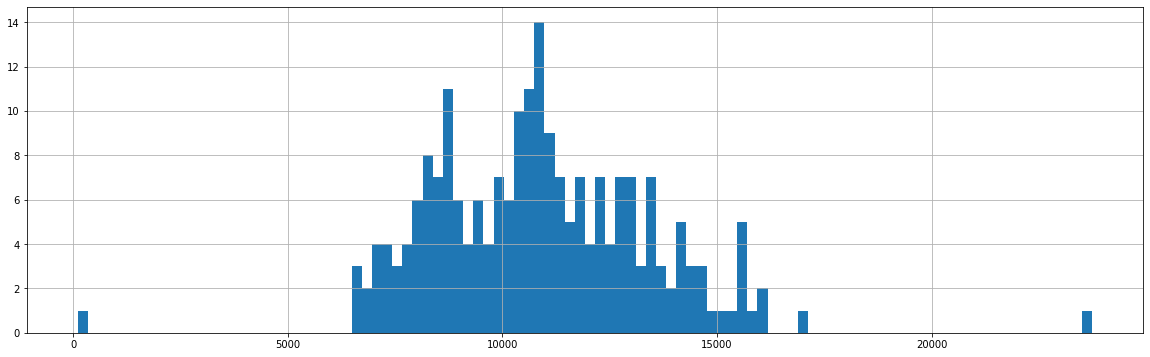

In [25]:
mobile_sales.Sales.hist(bins=100).plot()

In [31]:
mobile_sales.Sales.quantile(0.995)

16879.15999999999

In [32]:
mobile_sales.Sales.quantile(0.005)

6522.12

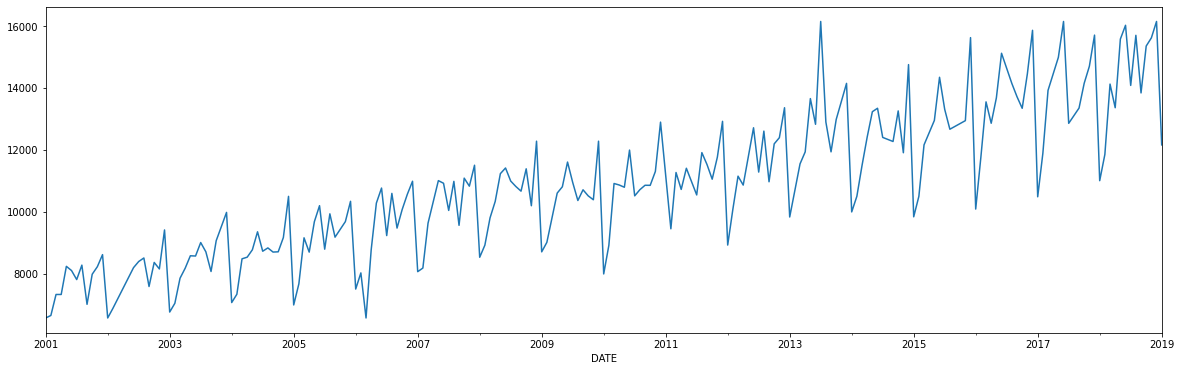

In [35]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))

<AxesSubplot:xlabel='DATE'>

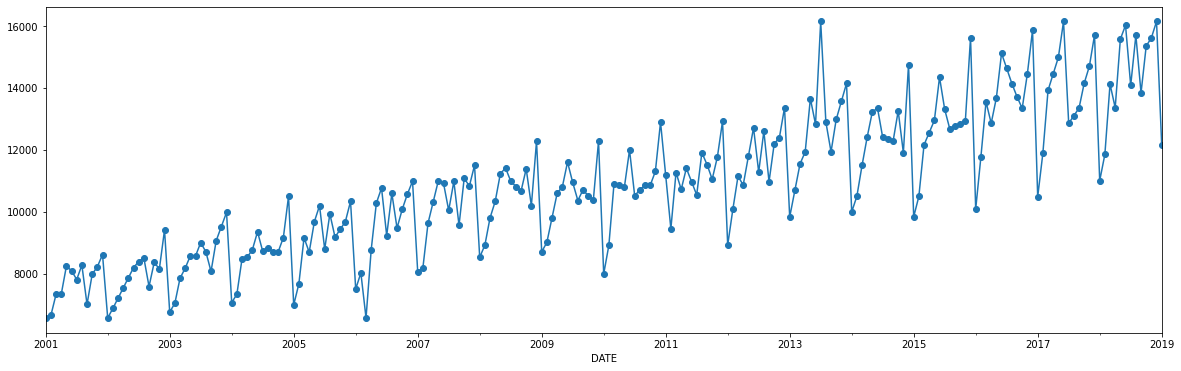

In [39]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE', inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate()
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))
mobile_sales.Sales.plot(style='-o')

<AxesSubplot:xlabel='DATE'>

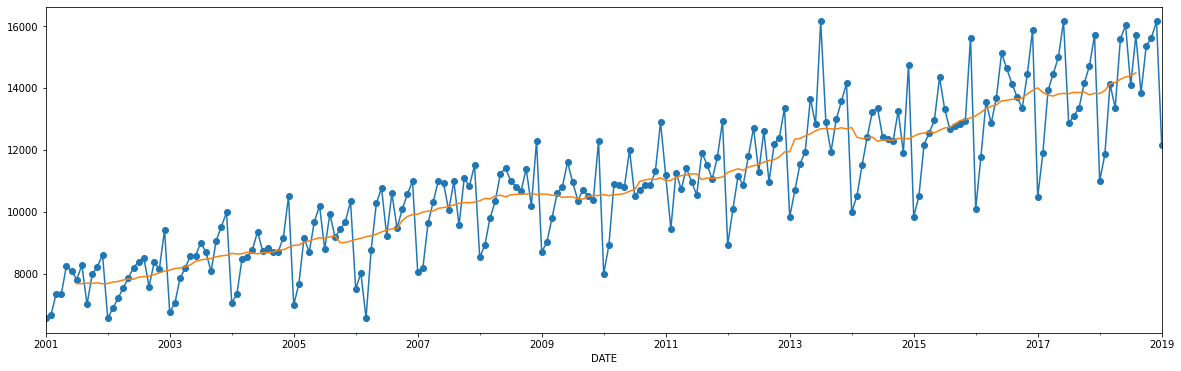

In [66]:
mobile_sales.Sales.plot(style='-o')
mobile_sales.Sales.rolling(12, center=True).mean().plot()
# mobile_sales.Sales.rolling(12, center=False).mean().plot()

### Decomposition

In [87]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

In [88]:
plt.rcParams['figure.figsize'] = (20, 10)

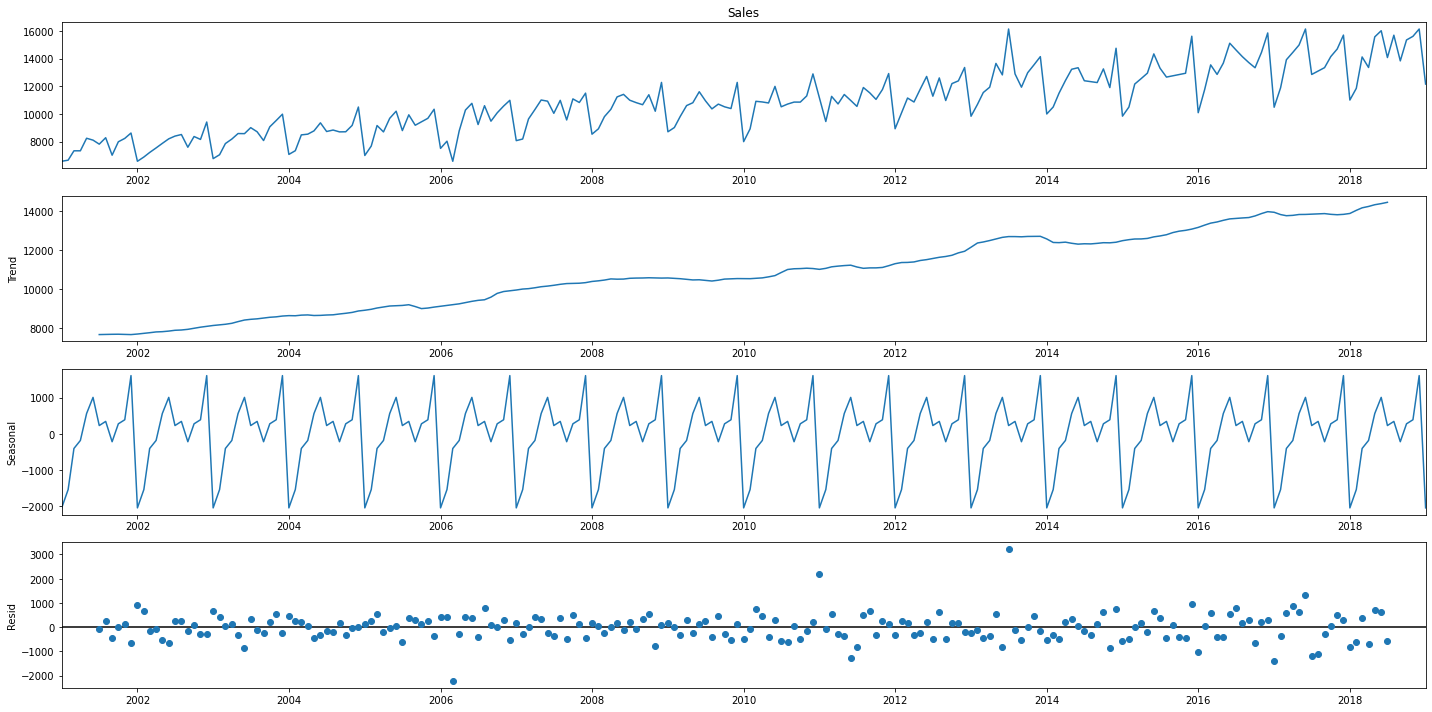

In [89]:
model.plot();

### Decomposition from Scratch

In [90]:
(model.resid**2).mean()**0.5

551.2232849558567

In [86]:
(model.resid**2).mean()**0.5

1.0008306586459998